In [165]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stat
import math

In [166]:
AsOfDate = ql.Date(15,10,2018)
ql.Settings.instance().evaluationDate = AsOfDate
DayCount = ql.Actual365Fixed()
Calendar = ql.UnitedStates()

In [167]:
# INSTRUMENT1D CONFIG #
MaturityDate = ql.Date(15,10,2022)
TargetDate = ql.Date(13,10,2022)
strike = 100
option_type = ql.Option.Call
payoff = ql.PlainVanillaPayoff(option_type, strike)
exercise = ql.EuropeanExercise(MaturityDate)
EuropeanOption = ql.VanillaOption(payoff, exercise)

In [168]:
# Heston Engine
r=ql.SimpleQuote(0.01)
q=ql.SimpleQuote(0.00001)
s0=ql.SimpleQuote(100)
r_ts = ql.FlatForward(0,Calendar,ql.QuoteHandle(r),DayCount)
q_ts = ql.FlatForward(0,Calendar,ql.QuoteHandle(q),DayCount)
v0 = 0.01
kappa=0.5
theta=0.01
sigma=0.0001
rho=-0.5
HestonParams = [theta,kappa,sigma,rho,v0]
relTolerance=0.01
maxEval=20000
HestonProcess = ql.HestonProcess(ql.YieldTermStructureHandle(r_ts),ql.YieldTermStructureHandle(q_ts),
                                 ql.QuoteHandle(s0),v0,kappa,theta,sigma,rho)
HestonModel = ql.HestonModel(HestonProcess)
HestonEngine = ql.AnalyticHestonEngine(HestonModel,relTolerance,maxEval)
#EuropeanOption.setPricingEngine(HestonEngine)

#Black Scholes Engine
vol_bs = ql.SimpleQuote(0.10)
vol_bs_ts = ql.BlackConstantVol(0,Calendar,ql.QuoteHandle(vol_bs),DayCount)
BSProcess = ql.BlackScholesMertonProcess(ql.QuoteHandle(s0),ql.YieldTermStructureHandle(r_ts),ql.YieldTermStructureHandle(q_ts),
                               ql.BlackVolTermStructureHandle(vol_bs_ts))
BSEngine = ql.AnalyticEuropeanEngine(BSProcess)
EuropeanOption.setPricingEngine(BSEngine)

In [169]:
HedgingStepDays = 1
timestep = int((TargetDate-AsOfDate)/HedgingStepDays)
length = DayCount.yearFraction(AsOfDate,MaturityDate)
dimension = HestonProcess.factors()*timestep
timeGrid = [n/timestep*length for n in range(timestep+1)]
gaussianRandSeqGen = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(dimension,ql.UniformRandomGenerator()))
brownianBridge = False
HestonPathGen = ql.GaussianMultiPathGenerator(HestonProcess,timeGrid,gaussianRandSeqGen,brownianBridge)


vol_bs_2 = ql.SimpleQuote(0.10)
vol_bs_ts_2 = ql.BlackConstantVol(0,Calendar,ql.QuoteHandle(vol_bs_2),DayCount)
BSProcess2 = ql.BlackScholesMertonProcess(ql.QuoteHandle(s0),ql.YieldTermStructureHandle(r_ts),ql.YieldTermStructureHandle(q_ts),
                               ql.BlackVolTermStructureHandle(vol_bs_ts_2))
gaussianRandSeqGen2 = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep,ql.UniformRandomGenerator()))
BSPathGen = ql.GaussianPathGenerator(BSProcess2, length, timestep, gaussianRandSeqGen2, brownianBridge)

In [134]:
def GeneratePaths(NumPaths,PathGen,nb_factors=1,nb_assets=1):
    arr = np.zeros((NumPaths*nb_assets, timestep+1))
    for i in range(NumPaths):
        sample_path = PathGen.next()
        path = sample_path.value()
        path_ref = []
        if nb_factors == 1:
            path_ref = path
        else:
            path_ref = path[0]
        if i==0:
            time = [path_ref.time(j) for j in range(len(path))]
        for k in range(nb_assets):
            if k == 0:
                value = [path_ref[j] for j in range(len(path_ref))]
            else:
                value = [path[k][j] for j in range(len(path[k]))]
        arr[i*nb_assets+k, :] = np.array(value)
    return np.array(time), arr

In [84]:
nb_factors = HestonProcess.factors()
nb_assets = 1
NumPaths = 100000
time, my_path = GeneratePaths(NumPaths,HestonPathGen,nb_factors,nb_assets)

print(r.value()-vol_bs.value()*vol_bs.value()/2)
Heston_ln_S = np.log(my_path[:,len(my_path[0])-1]/my_path[0,0])
describHeston = stat.describe(Heston_ln_S)
print('min = ' + str(describHeston.minmax[0]))
print('max = ' + str(describHeston.minmax[1]))
print('mean = ' + str(describHeston.mean))
print('std = ' + str(math.sqrt(describHeston.variance)))
print('skew = ' + str(describHeston.skewness))
print('kurtosis = ' + str(describHeston.kurtosis))

0.004999999999999999
min = -4.205938140747566e-05
max = 4.22550376298434e-05
mean = 3.0575209472133926e-08
std = 9.984830670067917e-06
skew = 0.002604495300310055
kurtosis = -0.02051284715094015


n = 1000
n = 2000
n = 3000
n = 4000
n = 5000
n = 6000
n = 7000
n = 8000
n = 9000
n = 10000
n = 11000
n = 12000
n = 13000
n = 14000
n = 15000
n = 16000
n = 17000
n = 18000
n = 19000
n = 20000
n = 21000
n = 22000
n = 23000
n = 24000
n = 25000
n = 26000
n = 27000
n = 28000
n = 29000
n = 30000
n = 31000
n = 32000
n = 33000
n = 34000
n = 35000
n = 36000
n = 37000
n = 38000
n = 39000
n = 40000
n = 41000
n = 42000
n = 43000
n = 44000
n = 45000
n = 46000
n = 47000
n = 48000
n = 49000
n = 50000
n = 51000
n = 52000
n = 53000
n = 54000
n = 55000
n = 56000
n = 57000
n = 58000
n = 59000
n = 60000
n = 61000
n = 62000
n = 63000
n = 64000
n = 65000
n = 66000
n = 67000
n = 68000
n = 69000
n = 70000
n = 71000
n = 72000
n = 73000
n = 74000
n = 75000
n = 76000
n = 77000
n = 78000
n = 79000
n = 80000
n = 81000
n = 82000
n = 83000
n = 84000
n = 85000
n = 86000
n = 87000
n = 88000
n = 89000
n = 90000
n = 91000
n = 92000
n = 93000
n = 94000
n = 95000
n = 96000
n = 97000
n = 98000
n = 99000
n = 100000


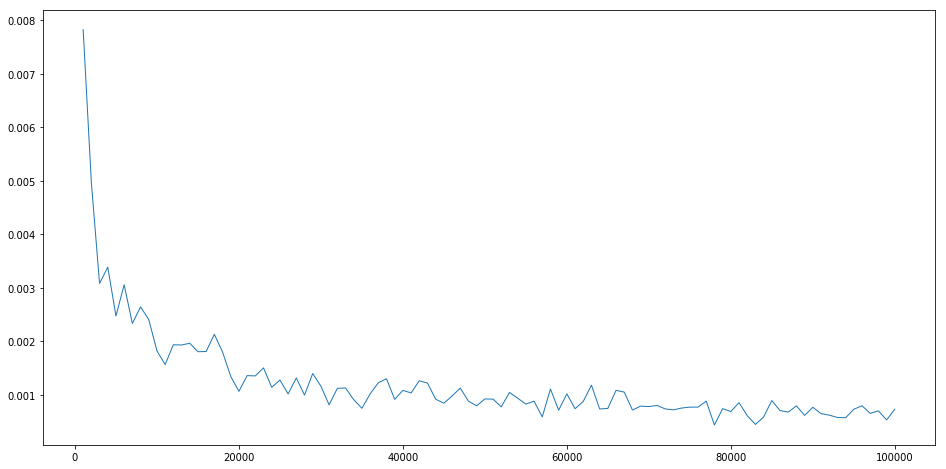

In [106]:
nb_factors = BSProcess.factors()
nb_assets = 1
NumPathMin = 1000
NumPathMax = 100000
NumPathStep = 1000
my_mean = np.zeros(int((NumPathMax-NumPathMin)/NumPathStep)+1)
def GenerateDescribe(NumPathMin,NumPathMax,NumPathStep):
    i = 0
    for n in range(NumPathMin,NumPathMax+NumPathStep,NumPathStep):
        time, my_path = GeneratePaths(NumPaths,BSPathGen,nb_factors,nb_assets)
        mu = r.value()-vol_bs.value()*vol_bs.value()/2
        denom = vol_bs.value()*math.sqrt(n)
        BS_ln_S = (np.log(my_path[:,len(my_path[0])-1]/my_path[0,0]) - mu) / denom
        describBS = stat.describe(BS_ln_S)
        print('n = ' + str(n))
        #print('min = ' + str(describBS.minmax[0]))
        #print('max = ' + str(describBS.minmax[1]))
        #print('mean = ' + str(describBS.mean))
        my_mean[i] = abs(describBS.mean)
        i += 1
        #print('std = ' + str(math.sqrt(describBS.variance)))
        #print('skew = ' + str(describBS.skewness))
        #print('kurtosis = ' + str(describBS.kurtosis))
        #print('\n')

GenerateDescribe(NumPathMin,NumPathMax,NumPathStep)
# GRAPHIC PLOT #
plt.figure(1,figsize=(16,8))
plt.plot(range(NumPathMin,NumPathMax+NumPathStep,NumPathStep), my_mean, label='Mean Cvg', lw=1, alpha=1)
plt.show()

In [170]:
Comp = interestRate.compoundFactor(ql.Settings.instance().evaluationDate-HedgingStepDays,ql.Settings.instance().evaluationDate) - 1
print(Comp)
dt = DayCount.yearFraction(ql.Settings.instance().evaluationDate-HedgingStepDays,ql.Settings.instance().evaluationDate)
print(math.exp(r.value()*dt)-1)

2.7261552008939205e-05
2.7397635582238067e-05


In [171]:
def BacktestDeltaHedgeNoRecalib(PathGen,Instrument,spot,interestRate):
    arr = np.zeros((2*nb_assets, timestep+1))
    seq = PathGen.next()
    path = seq.value()
    path_ref = []
    if nb_factors == 1:
        path_ref = path
    else:
        path_ref = path[0]
    time = [path_ref.time(j) for j in range(len(path))]
    instrument_value = np.zeros(len(path_ref))
    portfolio_value = np.zeros(len(path_ref))
    LocalDate = ql.Settings.instance().evaluationDate
    Delta = 0
    for m in range(len(path_ref)):
        
        spot.setValue(path_ref[m])
        instrument_value[m] = Instrument.NPV()
        
        #Comp = interestRate.compoundFactor(ql.Settings.instance().evaluationDate-HedgingStepDays,ql.Settings.instance().evaluationDate) - 1
        Comp = math.exp(r.value()*dt)-1
        if m==0:
            portfolio_value[m] = instrument_value[m]
        else:
            portfolio_value[m] = portfolio_value[m-1]+Comp*(portfolio_value[m-1]-Delta*path_ref[m-1])+Delta*(path_ref[m]-path_ref[m-1])
            
        Delta = Instrument.delta()
        
        ql.Settings.instance().evaluationDate += HedgingStepDays
        
        
    arr[0, :] = instrument_value
    arr[1, :] = portfolio_value
    return np.array(time), arr



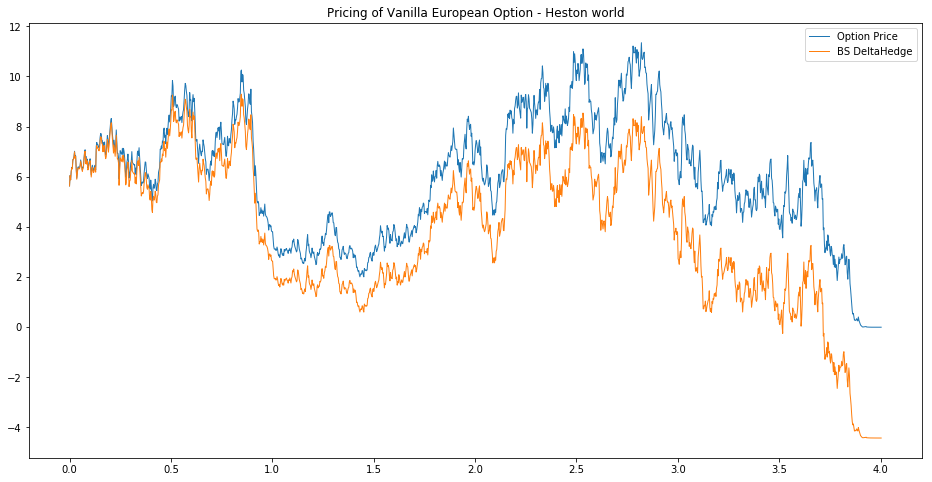

In [136]:
nb_factors = HestonProcess.factors()
nb_assets = 1
ql.Settings.instance().evaluationDate = AsOfDate
interestRate = ql.InterestRate(r.value(), DayCount, ql.Compounded, ql.Annual)
s0.setValue(100)

# BACKTEST COMPUTATION #
time, path = BacktestDeltaHedgeNoRecalib(HestonPathGen,EuropeanOption,s0,interestRate)

# GRAPHIC PLOT #
plt.figure(1,figsize=(16,8))
plt.plot(time, path[0, :], label='Option Price', lw=1, alpha=1)
plt.plot(time, path[1, :], label='BS DeltaHedge', lw=1, alpha=1)
plt.title("Pricing of Vanilla European Option - Heston world")
plt.legend()
plt.show()

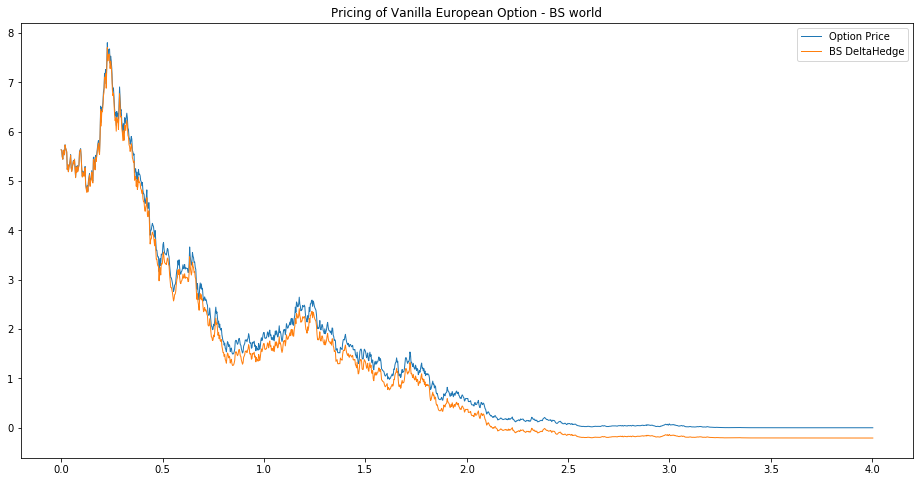

In [158]:
nb_factors = BSProcess.factors()
nb_assets = 1
ql.Settings.instance().evaluationDate = AsOfDate
interestRate = ql.InterestRate(r.value(), DayCount, ql.Compounded, ql.Annual)
s0.setValue(100)
EuropeanOption.setPricingEngine(BSEngine)


# BACKTEST COMPUTATION #
time, path = BacktestDeltaHedgeNoRecalib(BSPathGen,EuropeanOption,s0,interestRate)

# GRAPHIC PLOT #
plt.figure(1,figsize=(16,8))
plt.plot(time, path[0, :], label='Option Price', lw=1, alpha=1)
plt.plot(time, path[1, :], label='BS DeltaHedge', lw=1, alpha=1)
plt.title("Pricing of Vanilla European Option - BS world")
plt.legend()
plt.show()

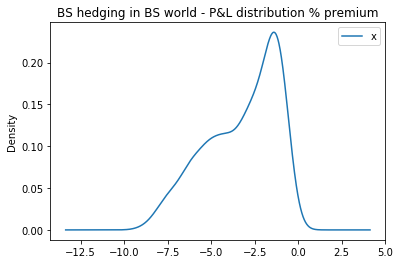

In [172]:
n = 1000
nb_factors = BSProcess.factors()
nb_assets = 1
PL_BS_BS = np.zeros(n)
s0.setValue(100)
ql.Settings.instance().evaluationDate = AsOfDate
Price0 = EuropeanOption.NPV()
for i in range(n):
    s0.setValue(100)
    ql.Settings.instance().evaluationDate = AsOfDate
    time, path = BacktestDeltaHedgeNoRecalib(BSPathGen,EuropeanOption,s0,interestRate)
    PL_BS_BS[i]=path[1,len(path[0])-1]-path[0,len(path[0])-1]
df1 = pd.DataFrame({'x':PL_BS_BS})
ax = df1.plot.kde(title="BS hedging in BS world - P&L distribution % premium")

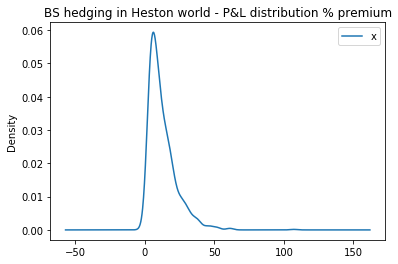

In [74]:
n = 1000
nb_factors = HestonProcess.factors()
nb_assets = 1
PL_BS_Heston = np.zeros(n)
s0.setValue(100)
ql.Settings.instance().evaluationDate = AsOfDate
Price0 = EuropeanOption.NPV()
for i in range(n):
    s0.setValue(100)
    ql.Settings.instance().evaluationDate = AsOfDate
    time, path = BacktestDeltaHedgeNoRecalib(HestonPathGen,EuropeanOption,s0,interestRate)
    PL_BS_Heston[i]=path[1,len(path[0])-1]-path[0,len(path[0])-1]
df2 = pd.DataFrame({'x':PL_BS_Heston})
ax = df2.plot.kde(title="BS hedging in Heston world - P&L distribution % premium")

In [173]:
print('\nP&L analysis : BS hedging in BS world\n')
describ1 = stat.describe(df1)
print('min = ' + str(describ1.minmax[0][0]))
print('max = ' + str(describ1.minmax[1][0]))
print('mean = ' + str(describ1.mean[0]))
print('var = ' + str(describ1.variance[0]))
print('skew = ' + str(describ1.skewness[0]))
print('kurtosis = ' + str(describ1.kurtosis[0]))
describ2 = stat.describe(df2)
print('\n\nP&L analysis : BS hedging in Heston world\n')
print('min = ' + str(describ2.minmax[0][0]))
print('max = ' + str(describ2.minmax[1][0]))
print('mean = ' + str(describ2.mean[0]))
print('var = ' + str(describ2.variance[0]))
print('skew = ' + str(describ2.skewness[0]))
print('kurtosis = ' + str(describ2.kurtosis[0]) + '\n')


P&L analysis : BS hedging in BS world

min = -8.991659536030298
max = -0.24616755864242681
mean = -3.264409652763681
var = 4.266218508717732
skew = -0.6051369221471697
kurtosis = -0.7021421776937613


NameError: name 'df2' is not defined